# Project - 14 Restaurant Food Cost

Project Description:-

Food is necessary for human beings and it is most important thing in anu human life. Every persons has some favourite foods in thir books and they want to have their favourite foods. There are many restaurants in india who speacialized in some favourite foods accroding to every one choice. However we like to have foods from our favourite restaturant but the one thing wwhich we consider every time before choose the restaurant is the cost.So food cost is very import key play to deside which restaurant we should go according our budget. In this project I have dataset with some feautres on which i will apply some regression techniques to predict the restaurant food cost which will help to take the decision that which restaurant we should choose.

Dataset Description:-

I have two dataset one is training on which i will train and build the model and other is test data on which i will do the prediction and store the result. There are many features in training dataset on which i will use my regression techniques and try to predict the result. Below are the description of feature.

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

In [75]:
#Importing some libary to import the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import warnings
import warnings
warnings.filterwarnings('ignore')


In [76]:
#Importing data into dataframe called df by using panda library
Train_data = pd.read_excel("Data_Train.xlsx")#Loading the train data
Test_data = pd.read_excel("Data_Test.xlsx")#Loading the test data

In [77]:
#Checking the top 5 records of train data
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [78]:
#Checking the top 5 records of test data
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [79]:
#Checking the shape of train and test data
print("Train_data:- ",Train_data.shape)
print('\n')
print("Test_data:- ",Test_data.shape)

Train_data:-  (12690, 9)


Test_data:-  (4231, 8)


Observation:-From above we can observe that there are 12690 rows and 9 columns available in Train data where as there are 4231 rows and 8 columns are available in the test data.

# Train Data

In [80]:
#Checking the columns of train data
Train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [81]:
#Checking for null value present in dataset
Train_data.isnull().values.any()

True

In [82]:
#Cheecking null values present column wise
Train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

We can see that there is missing values presentin columns like City,Locality,Rating and Votes.

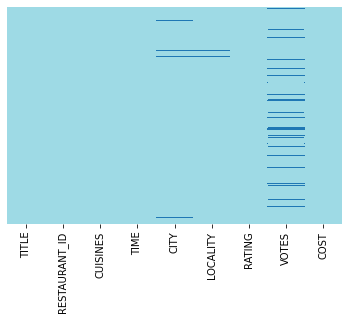

In [83]:
#Checking this by visualization Method
sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

So here we can see that there is null values present in the dataset so we have fill them and we can drop the null values in 
rating column.

In [84]:
Train_data['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [85]:
Train_data['CITY'].fillna('missing', inplace=True) #Filling missing values for column CITY
Train_data['LOCALITY'].fillna('missing', inplace=True) #Filling missing values for LOCALITY
Train_data['RATING'].fillna('0', inplace=True) #Filling missing values for RATING
Train_data['VOTES']= Train_data['VOTES'].str.replace(' votes', '')#Removing votes string from VOTES column
Train_data['VOTES'].fillna('0', inplace=True) #Filling missing values in the column VOTES

In [86]:
#Checking again the missing values columnwise
Train_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

Here we can see that Rating has still missing values and not replaced. So i will drop these 2 records.

In [87]:
Train_data.dropna(inplace=True)#Droping the records 

In [88]:
Train_data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

Now we can see that there is no missing values present in the dataset.

In [89]:
#Checking shape again
Train_data.shape

(12690, 9)

In [90]:
#Checking information like non null, count and dtype
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 991.4+ KB


Observation:-

We can see here ,there are 12688 non-null values present in the dataset. So it conclude that there is no missing value present.
The  datatype of all columns accept of Restaurant ID and Cost are object so we have to encode and convert it into numerical
values in order to build the model as it is not accept string values.

# Summary Statistics

In [91]:
Train_data.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


Observation:-

1. There are 12688 records available so it means no missing values are present.
2. The minimum cost is 20 INR and maximum is 14000 INR for the food available.
3. The average cost of food all over restaurant is 655 INR.
4. The mean is high than median in COST so i can say that the COST is righ skewed and this columns has +ve skewnees present.
5. The difference between 75 percentile and max is high so there is also outliers or unusual data present.
6. STD is high in the COST column so range is high and data is spread not normally distributed.

# Exploratory Data Analysis

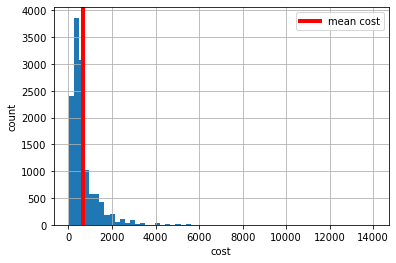



Mean cost:  655.2522458628841


In [92]:
#Checking how my target variable distributed and mean fees
cost  = Train_data['COST'].hist(bins=60)
mean_val = np.mean(Train_data['COST'])
plt.axvline(mean_val,linewidth=4,color="red",label="mean cost")
plt.xlabel("cost")
plt.ylabel("count")
plt.legend()
plt.show()
print("\n")
print("Mean cost: ",mean_val)


Here we can observe that maximum distribution of cost lies under 6000. The mean cost is 655.312 INR. We can see that COST is 
right skewed .

In [93]:
#Checking the different types of TITLE with there counts
Train_data["TITLE"]=Train_data["TITLE"].str.split(",")
TITLE ={}
for x in Train_data["TITLE"].values:
    for each in x:
        each = each.strip()
        if each in TITLE:
            TITLE[each]+=1
        else:
            TITLE[each]=1

In [94]:
print(TITLE)

{'CASUAL DINING': 4379, 'BAR': 682, 'QUICK BITES': 4598, 'DESSERT PARLOR': 616, 'CAFÉ': 843, 'MICROBREWERY': 71, 'BEVERAGE SHOP': 249, 'IRANI CAFE': 3, 'BAKERY': 532, 'None': 1003, 'PUB': 138, 'FINE DINING': 358, 'SWEET SHOP': 155, 'LOUNGE': 201, 'FOOD COURT': 108, 'FOOD TRUCK': 31, 'MESS': 53, 'KIOSK': 60, 'CLUB': 28, 'CONFECTIONERY': 5, 'DHABA': 45, 'MEAT SHOP': 3, 'COCKTAIL BAR': 6, 'PAAN SHOP': 5}


From above instead of using all i will use top 10 TITLE

In [95]:
#Extract top 10 TITLE
most_TITLE = sorted(TITLE.items(),key=lambda x:x[1],reverse=True)[:11]
final_TITLE = []
for title in most_TITLE:
    final_TITLE.append(title[0])
    
print(final_TITLE)

['QUICK BITES', 'CASUAL DINING', 'None', 'CAFÉ', 'BAR', 'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP', 'LOUNGE', 'SWEET SHOP']


In [96]:
#Encode extracted top 10 TITLE into new columns in dataset
import numpy as np
import warnings
warnings.filterwarnings('ignore')
for title in final_TITLE:
    Train_data[title] = 0

for x,y in zip(Train_data['TITLE'].values, np.array([i for i in range(len(Train_data))])):
    for c in x:
        c = c.strip()
        if c in final_TITLE:
            Train_data[c][y] = 1

In [97]:
Train_data.drop(['TITLE'],axis=1,inplace=True)#Droping TITLE Column as i have extracted the useful information from it
Train_data.drop(['None'],axis=1,inplace=True)#Droping None column as it is of no use
Train_data.head()#Checking the dataset 

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,BEVERAGE SHOP,LOUNGE,SWEET SHOP
0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,0,1,0,0,0,0,0,0,0,0
1,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,0,1,0,1,0,0,0,0,0,0
2,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,0,1,0,0,0,0,0,0,0,0
3,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,1,0,0,0,0,0,0,0,0,0
4,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0,0,0,0,1,0,0,0,0,0


In [98]:
#Checking the different types of CUISINES with there counts
Train_data["CUISINES"]=Train_data["CUISINES"].str.split(",")
CUISINES ={}
for x in Train_data["CUISINES"].values:
    for each in x:
        each = each.strip()
        if each in CUISINES:
            CUISINES[each]+=1
        else:
            CUISINES[each]=1

In [99]:
print(CUISINES)

{'Malwani': 53, 'Goan': 33, 'North Indian': 5383, 'Asian': 441, 'Modern Indian': 69, 'Japanese': 139, 'Chinese': 4368, 'Biryani': 1260, 'Hyderabadi': 140, 'Tibetan': 51, 'Desserts': 1146, 'Seafood': 588, 'Cafe': 830, 'Pizza': 512, 'Burger': 364, 'Bar Food': 34, 'South Indian': 2274, 'Fast Food': 2121, 'Beverages': 967, 'Arabian': 396, 'Mughlai': 761, 'Maharashtrian': 80, 'Parsi': 19, 'Thai': 320, 'Bakery': 655, 'Momos': 383, 'Continental': 1563, 'European': 259, 'Rolls': 250, 'Andhra': 256, 'Italian': 1145, 'BBQ': 175, 'Finger Food': 277, 'Tea': 59, 'American': 302, 'Healthy Food': 219, 'Coffee': 43, 'Indonesian': 18, 'Korean': 36, 'Nepalese': 13, 'Ice Cream': 357, 'Mexican': 254, 'Kerala': 515, 'Indian': 38, 'Mithai': 189, 'Street Food': 663, 'Malaysian': 41, 'Vietnamese': 29, 'Iranian': 10, 'Kebab': 233, 'Juices': 235, 'Sandwich': 247, 'Mediterranean': 153, 'Salad': 250, 'Gujarati': 43, 'Rajasthani': 51, 'Tex-Mex': 21, 'Roast Chicken': 4, 'Burmese': 25, 'Chettinad': 134, 'North Easte

In [100]:
#Extract top 15 CUISINES
most_CUISINES = sorted(CUISINES.items(),key=lambda x:x[1],reverse=True)[:15]
final_CUISINES = []
for C in most_CUISINES:
    final_CUISINES.append(C[0])
    
print(final_CUISINES)    

['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Continental', 'Biryani', 'Desserts', 'Italian', 'Beverages', 'Cafe', 'Mughlai', 'Street Food', 'Bakery', 'Seafood', 'Kerala']


In [101]:
#Encode extracted top 15 CUISINES into new columns in dataset
import numpy as np
import warnings
warnings.filterwarnings('ignore')
for cuisine in final_CUISINES:
    Train_data[cuisine] = 0

for x,y in zip(Train_data['CUISINES'].values, np.array([i for i in range(len(Train_data))])):
    for c in x:
        c = c.strip()
        if c in final_CUISINES:
            Train_data[c][y] = 1

In [102]:
Train_data.drop(['CUISINES'],axis=1,inplace=True)#Droping column CUISINES as i have extracted all info from this
Train_data.sample()# Checking sample

,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,CAFÉ,...,Biryani,Desserts,Italian,Beverages,Cafe,Mughlai,Street Food,Bakery,Seafood,Kerala
10200,1433,"7:30am – 12midnight (Mon, Tue, Wed, Thu, Sat...",missing,Kalyan,3.5,40,300,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [103]:
#Checking the different types of Cities with there counts
Train_data["CITY"]=Train_data["CITY"].str.split(",")
CITY ={}
for x in Train_data["CITY"].values:
    for each in x:
        each = each.strip()
        if each in CITY:
            CITY[each]+=1
        else:
            CITY[each]=1

In [104]:
print(CITY)

{'Thane': 97, 'Chennai': 2174, 'Mumbai': 1722, 'Bangalore': 2149, 'Gurgaon': 379, 'Hyderabad': 1819, 'Kochi': 1279, 'Thane West': 52, 'Andheri Lokhandwala': 1, 'New Delhi': 1321, 'Andheri West': 48, 'Malad East': 1, '682036': 1, 'Bangalor': 1, 'Navi Mumbai': 165, 'Bandra West': 69, 'Delhi': 8, 'Noida': 211, 'Bangalore-560066': 1, 'Secunderabad': 310, 'missing': 112, 'India': 23, 'Madhuranagar': 1, 'Chennai Teynampet': 3, 'Faridabad': 79, 'Chembur.': 1, 'Maharashtra': 5, 'opp gurudwara Shakurpur': 1, 'Telagana Land Line:040-48507016': 1, 'Ghaziabad': 102, 'Karnataka': 2, 'Kerala': 10, 'Edappally': 7, 'Kadavanthra': 1, 'Ernakulam Circle kochi': 1, 'Bengalore': 6, 'Near Reliance Fresh': 1, 'Kilpauk': 4, 'Bengaluru': 42, 'Kothaguda': 2, 'Goregaon West': 1, 'Banglore': 4, 'Tamil Nadu': 5, 'Kakkanad': 15, 'Kochi Elamkulam': 1, 'Outer Ring Road': 1, 'Mulund East': 1, 'Secunderabad main road near signal NMREC COLLEGE': 1, 'Telangana': 7, 'Ponnuruni Kochi': 1, 'Gachibowli': 3, 'Semmancheri': 1,

In [105]:
#Extract top Cities then i will choose best 15 cities
most_CITY = sorted(CITY.items(),key=lambda x:x[1],reverse=True)[:10]
final_CITY = []
for city in most_CITY:
    final_CITY.append(city[0])
    
print(final_CITY)    

['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi', 'Gurgaon', 'Secunderabad', 'Noida', 'Navi Mumbai']


In [106]:
#Encode extracted top 15 CUISINES into new columns in dataset
import numpy as np
import warnings
warnings.filterwarnings('ignore')
for city in final_CITY:
    Train_data[city] = 0

for x,y in zip(Train_data['CITY'].values, np.array([i for i in range(len(Train_data))])):
    for c in x:
        c = c.strip()
        if c in final_CITY:
            Train_data[c][y] = 1

In [107]:
Train_data.drop(['CITY'],axis=1,inplace=True)#Droping column CUISINES as i have extracted all info from this
Train_data.sample()# Checking sample

,RESTAURANT_ID,TIME,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,CAFÉ,BAR,...,Chennai,Bangalore,Hyderabad,Mumbai,New Delhi,Kochi,Gurgaon,Secunderabad,Noida,Navi Mumbai
11997,6892,9:30am – 11pm (Mon-Sun),BTM,NEW,0,300,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [108]:
#I will drop column Restaurant id, time and locality as it is no use and very mess data.
Train_data.drop(['RESTAURANT_ID','TIME','LOCALITY'],axis=1,inplace=True)
Train_data.sample()

,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,...,Chennai,Bangalore,Hyderabad,Mumbai,New Delhi,Kochi,Gurgaon,Secunderabad,Noida,Navi Mumbai
3765,3.8,374,600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
Train_data['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '0', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [110]:
Train_data['RATING'] = np.where(Train_data['RATING']=="NEW",0, Train_data['RATING'])#Converting new into 0
Train_data['RATING'] = np.where(Train_data['RATING']=="-",0, Train_data['RATING'])#Converting _ into 0

In [111]:
Train_data['RATING'] =Train_data['RATING'].astype(float)# Converting object datatype into float for building model

In [112]:
Train_data['COST'] = Train_data['COST'].astype(float) #Converting object into int type

In [113]:
Train_data['VOTES']= Train_data['VOTES'].astype(int)

In [114]:
Train_data.dtypes

RATING            float64
VOTES               int32
COST              float64
QUICK BITES         int64
CASUAL DINING       int64
CAFÉ                int64
BAR                 int64
DESSERT PARLOR      int64
BAKERY              int64
FINE DINING         int64
BEVERAGE SHOP       int64
LOUNGE              int64
SWEET SHOP          int64
North Indian        int64
Chinese             int64
South Indian        int64
Fast Food           int64
Continental         int64
Biryani             int64
Desserts            int64
Italian             int64
Beverages           int64
Cafe                int64
Mughlai             int64
Street Food         int64
Bakery              int64
Seafood             int64
Kerala              int64
Chennai             int64
Bangalore           int64
Hyderabad           int64
Mumbai              int64
New Delhi           int64
Kochi               int64
Gurgaon             int64
Secunderabad        int64
Noida               int64
Navi Mumbai         int64
dtype: objec

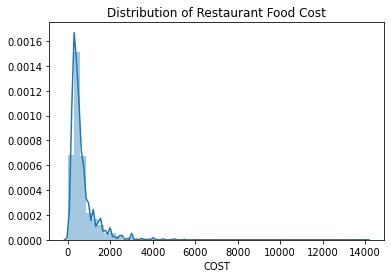



Minimum Cost:-  20.0
Maximum Cost:-  14000.0


In [115]:
#Checking the norml distribution of my target variable
sns.distplot(Train_data['COST'])
plt.title("Distribution of Restaurant Food Cost")
plt.show()
print('\n')
print("Minimum Cost:- ",Train_data['COST'].min())
print("Maximum Cost:- ",Train_data['COST'].max())

Observation:-
1. The cost is not normally distributed and it has skewnees which is +ve skewnees or right skewed.
2. The minimum cost is 20 INR and Highest cost is 14000.00.
3. The maxi mum cost distribution lies between 20 and 3000.

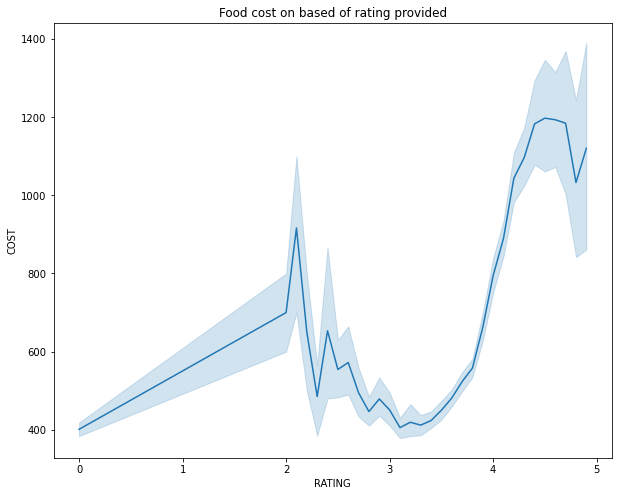

In [116]:
#Checking the Food Cost according to rating
plt.figure(figsize=(10,8))
sns.lineplot(x='RATING',y='COST',data=Train_data)
plt.title("Food cost on based of rating provided")
plt.show()

We can see that cost is fluctuating , we cannot say that high rating result high cost for the food.Food cost is high at the
rating between 4 and 5 and low at 0.

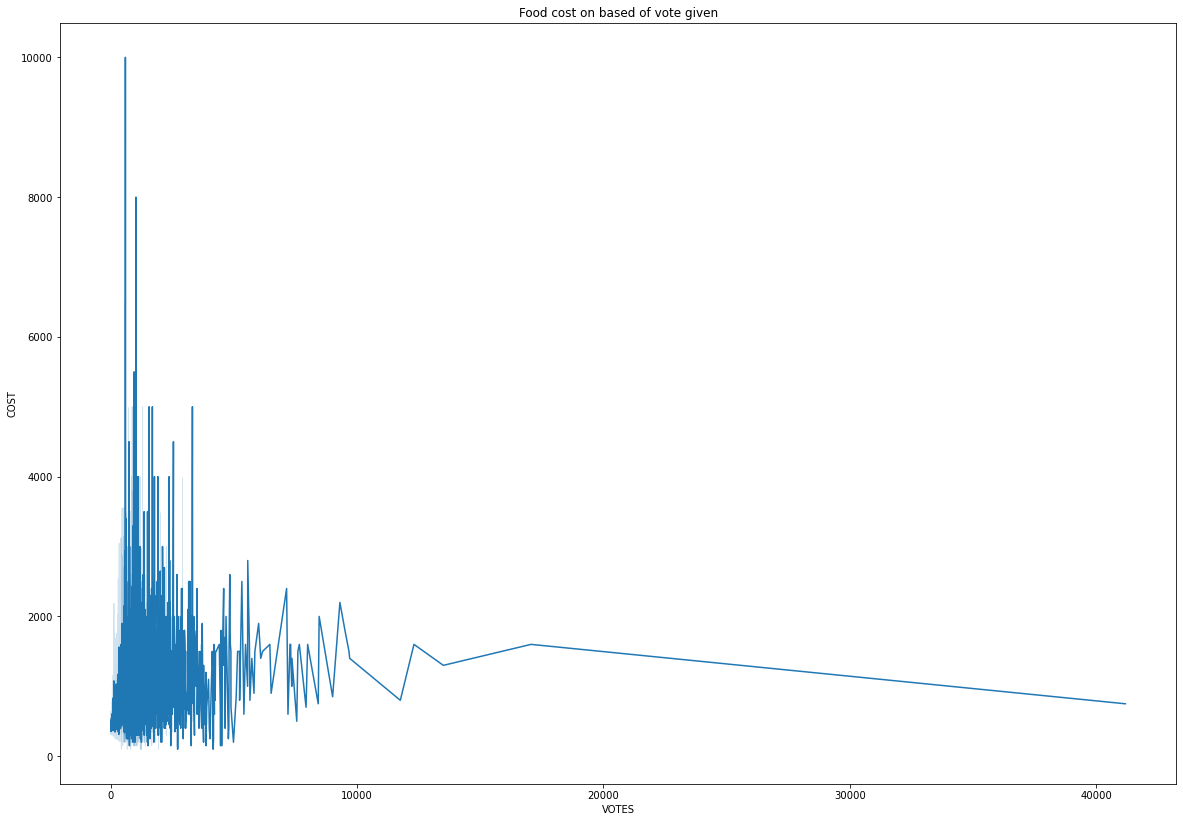

In [117]:
#Checking the Food Cost according to vote
plt.figure(figsize=(20,14))
sns.lineplot(x='VOTES',y='COST',data=Train_data)
plt.title("Food cost on based of vote given")
plt.show()

We can see that when no votes increase the cost is decrease . The maximum cost fluctuation lies between 0 and 10000.

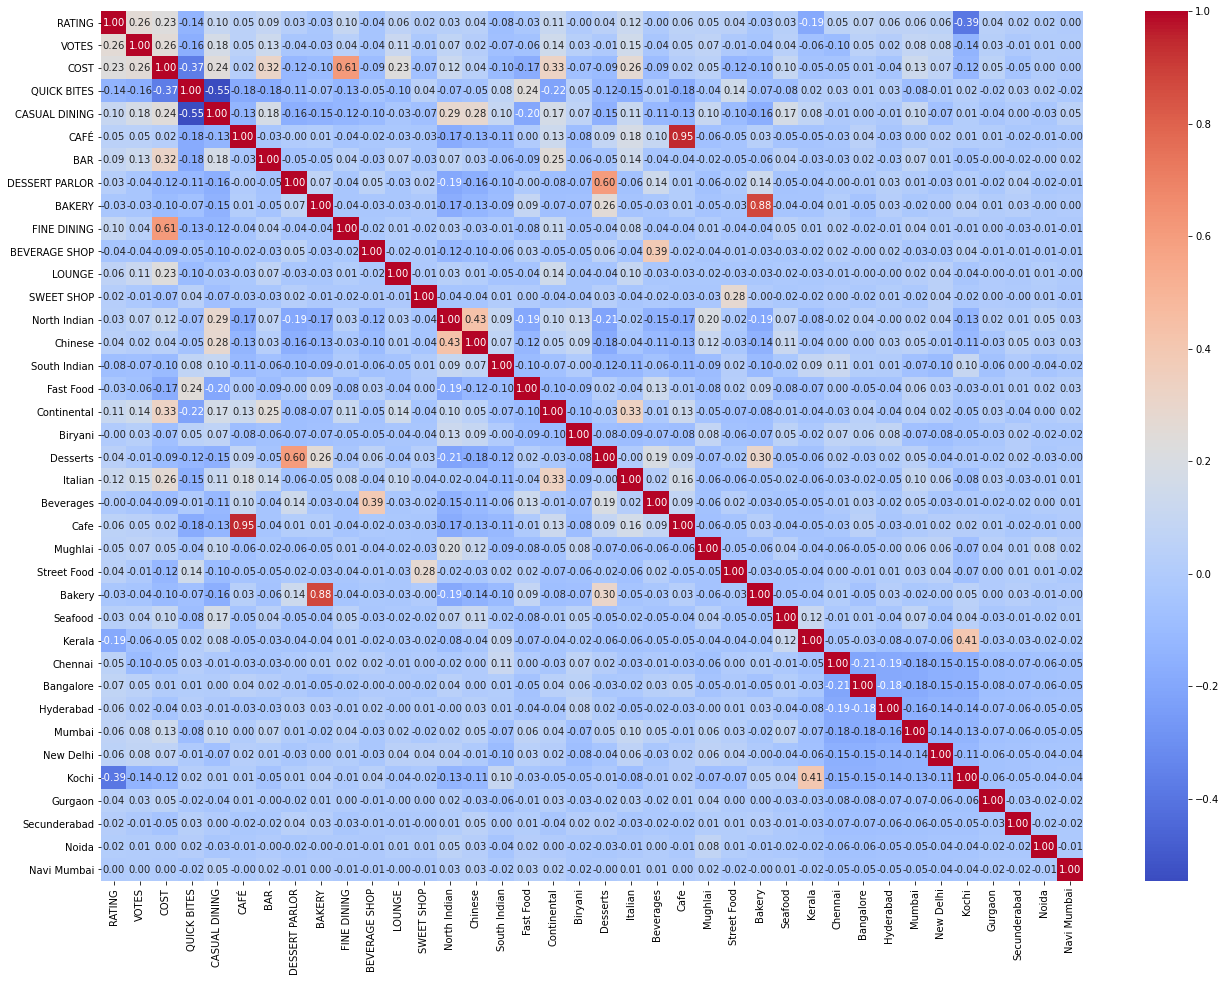

In [118]:
#Checking corelation of all columns with targer column
plt.figure(figsize=(22,16))
sns.heatmap(Train_data.corr(),cmap='coolwarm',annot=True,fmt='.2f')

Observation:-

1.Most positive corelated column with target variable:-Fine Dining
  so i can say that in fine dining restaurants the food cost is very high.

2.Most negative corelated columns - Quick Bites
  so i can say that the food cost is low at the quick bites type restaurant
    

Text(0.5, 1.0, 'Corelation With target variables')

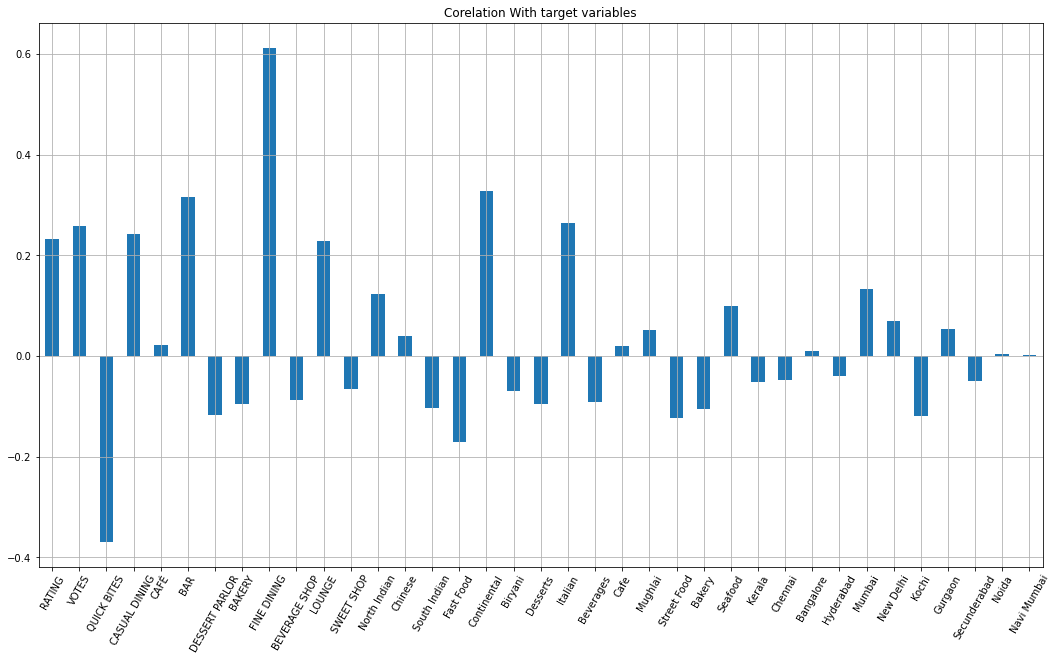

In [119]:
#The other way to check corelation and understand the relation with target column in better way
plt.figure(figsize=(18,10))
Train_data.drop('COST',axis=1).corrwith(Train_data['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=60)
plt.title('Corelation With target variables')

Observation:-

1. Here we can see that cost is increasing when the restaurant titles are Fine Dining, Bar, Continental etc.

2. The food cost is increasing in the cities like Mumbai, Gurgaon,New Delhi where as it relavantly decresing in Kochi,Hyderabad
    etc.

In [120]:
Test_data = pd.read_excel("Data_Test.xlsx")#Loading the test data

In [121]:
#Checking shape
Test_data.shape

(4231, 8)

In [122]:
Test_data.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [123]:
Test_data['CITY'].fillna('missing', inplace=True) #Filling missing values for column CITY
Test_data['VOTES'].fillna('0', inplace=True) #Filling missing values for column CITY
Test_data.drop(['RESTAURANT_ID','TIME','LOCALITY'],axis=1,inplace=True)
Test_data.dropna(inplace=True)


In [124]:
Test_data.isnull().sum()

TITLE       0
CUISINES    0
CITY        0
RATING      0
VOTES       0
dtype: int64

In [125]:
Test_data.shape

(4229, 5)

In [126]:
#Checking the different types of TITLE with there counts
Test_data["TITLE"]=Test_data["TITLE"].str.split(",")
TITLE ={}
for x in Test_data["TITLE"].values:
    for each in x:
        each = each.strip()
        if each in TITLE:
            TITLE[each]+=1
        else:
            TITLE[each]=1

In [127]:
print(TITLE)

{'CASUAL DINING': 1486, 'QUICK BITES': 1545, 'None': 283, 'FOOD TRUCK': 8, 'DESSERT PARLOR': 179, 'BAR': 218, 'LOUNGE': 62, 'BEVERAGE SHOP': 82, 'PUB': 51, 'CAFÉ': 297, 'BAKERY': 175, 'SWEET SHOP': 63, 'DHABA': 16, 'FINE DINING': 110, 'IRANI CAFE': 2, 'FOOD COURT': 36, 'KIOSK': 20, 'MESS': 15, 'MICROBREWERY': 27, 'CLUB': 11, 'COCKTAIL BAR': 1, 'MEAT SHOP': 1, 'CONFECTIONERY': 1, 'PAAN SHOP': 1, 'BHOJANALYA': 1}


In [128]:
#Extract top 11 TITLE
most_TITLE = sorted(TITLE.items(),key=lambda x:x[1],reverse=True)[:11]
final_TITLE = []
for title in most_TITLE:
    final_TITLE.append(title[0])
    
print(final_TITLE)

['QUICK BITES', 'CASUAL DINING', 'CAFÉ', 'None', 'BAR', 'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP', 'SWEET SHOP', 'LOUNGE']


In [129]:
#Encode extracted top 10 TITLE into new columns in dataset
import numpy as np
import warnings
warnings.filterwarnings('ignore')
for title in final_TITLE:
    Test_data[title] = 0

for x,y in zip(Test_data['TITLE'].values, np.array([i for i in range(len(Test_data))])):
    for c in x:
        c = c.strip()
        if c in final_TITLE:
            Test_data[c][y] = 1

In [130]:
Test_data.drop(['TITLE'],axis=1,inplace=True)#Droping TITLE Column as i have extracted the useful information from it
Test_data.drop(['None'],axis=1,inplace=True)#Droping None column as it is of no use
Test_data.head()#Checking the dataset 

,CUISINES,CITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,BEVERAGE SHOP,SWEET SHOP,LOUNGE
0,"North Indian, Chinese, Mughlai, Kebab",Noida,4.3,564 votes,0,1,0,0,0,0,0,0,0,0
1,"South Indian, Fast Food, Pizza, North Indian",Mumbai,4.2,61 votes,1,0,0,0,0,0,0,0,0,0
2,"North Indian, Seafood, Biryani, Chinese",Mumbai,3.8,350 votes,0,1,0,0,0,0,0,0,0,0
3,Biryani,Faridabad,3.8,1445 votes,0,0,0,0,0,0,0,0,0,0
4,"South Indian, Kerala",Kochi,3.6,23 votes,1,0,0,0,0,0,0,0,0,0


In [131]:
#Rearranging columns as per train data
new_col = Test_data['SWEET SHOP']
Test_data.drop(['SWEET SHOP'],axis=1,inplace=True)
idx=13
Test_data.insert(loc=idx, column='SWEET SHOP', value=new_col)
Test_data.head()

,CUISINES,CITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,BEVERAGE SHOP,LOUNGE,SWEET SHOP
0,"North Indian, Chinese, Mughlai, Kebab",Noida,4.3,564 votes,0,1,0,0,0,0,0,0,0,0
1,"South Indian, Fast Food, Pizza, North Indian",Mumbai,4.2,61 votes,1,0,0,0,0,0,0,0,0,0
2,"North Indian, Seafood, Biryani, Chinese",Mumbai,3.8,350 votes,0,1,0,0,0,0,0,0,0,0
3,Biryani,Faridabad,3.8,1445 votes,0,0,0,0,0,0,0,0,0,0
4,"South Indian, Kerala",Kochi,3.6,23 votes,1,0,0,0,0,0,0,0,0,0


In [132]:
#Checking the different types of CUISINES with there counts
Test_data["CUISINES"]=Test_data["CUISINES"].str.split(",")
CUISINES ={}
for x in Test_data["CUISINES"].values:
    for each in x:
        each = each.strip()
        if each in CUISINES:
            CUISINES[each]+=1
        else:
            CUISINES[each]=1

In [133]:
print(CUISINES)

{'North Indian': 1838, 'Chinese': 1480, 'Mughlai': 268, 'Kebab': 76, 'South Indian': 759, 'Fast Food': 745, 'Pizza': 188, 'Seafood': 180, 'Biryani': 423, 'Kerala': 205, 'Ice Cream': 107, 'Desserts': 361, 'Street Food': 218, 'French': 14, 'Finger Food': 97, 'Continental': 532, 'BBQ': 40, 'Rolls': 98, 'Momos': 110, 'Beverages': 319, 'Italian': 391, 'Mexican': 91, 'American': 86, 'Andhra': 71, 'Asian': 159, 'European': 67, 'Cafe': 285, 'Bakery': 219, 'Mediterranean': 49, 'Chettinad': 28, 'Arabian': 137, 'Drinks Only': 3, 'Burger': 129, 'Mithai': 68, 'Bengali': 29, 'Japanese': 51, 'Sushi': 21, 'Modern Indian': 18, 'Bubble Tea': 5, 'Hyderabadi': 40, 'Burmese': 7, 'Sandwich': 76, 'Thai': 107, 'Indian': 18, 'Gujarati': 8, 'Salad': 88, 'Lucknowi': 7, '': 46, 'Healthy Food': 71, 'Juices': 90, 'Malwani': 21, 'North Eastern': 4, 'Iranian': 5, 'Parsi': 9, 'Maharashtrian': 15, 'Konkan': 7, 'Mangalorean': 13, 'Lebanese': 50, 'Afghan': 9, 'African': 2, 'Portuguese': 2, 'Middle Eastern': 9, 'Tea': 20,

In [134]:
#Extract top 16 CUISINES
most_CUISINES = sorted(CUISINES.items(),key=lambda x:x[1],reverse=True)[:16]
final_CUISINES = []
for C in most_CUISINES:
    final_CUISINES.append(C[0])
    
print(final_CUISINES)    

['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Continental', 'Biryani', 'Italian', 'Desserts', 'Beverages', 'Cafe', 'Mughlai', 'Bakery', 'Street Food', 'Kerala', 'Pizza', 'Seafood']


In [135]:
#Encode extracted top CUISINES into new columns in dataset
import numpy as np
import warnings
warnings.filterwarnings('ignore')
for cuisine in final_CUISINES:
    Test_data[cuisine] = 0

for x,y in zip(Test_data['CUISINES'].values, np.array([i for i in range(len(Test_data))])):
    for c in x:
        c = c.strip()
        if c in final_CUISINES:
            Test_data[c][y] = 1

In [136]:
Test_data.drop(['CUISINES'],axis=1,inplace=True)#Droping column CUISINES as i have extracted all info from this
Test_data.drop(['Pizza'],axis=1,inplace=True)#Droping column CUISINES as i have extracted all info from this

Test_data.sample()# Checking sample

,CITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,...,Biryani,Italian,Desserts,Beverages,Cafe,Mughlai,Bakery,Street Food,Kerala,Seafood
2943,Chennai,4.5,598 votes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
#Rearranging columns as per train data
new_col = Test_data['Italian']
Test_data.drop(['Italian'],axis=1,inplace=True)
idx=20
Test_data.insert(loc=idx, column='Italian', value=new_col)
Test_data.sample()

,CITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,...,Biryani,Desserts,Italian,Beverages,Cafe,Mughlai,Bakery,Street Food,Kerala,Seafood
2408,Greater Noida,4.1,354 votes,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [144]:
#Rearranging columns as per train data
new_col = Test_data['Bakery']
Test_data.drop(['Bakery'],axis=1,inplace=True)
idx=25
Test_data.insert(loc=idx, column='Bakery', value=new_col)
Test_data.sample()

,CITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,...,Biryani,Desserts,Italian,Beverages,Cafe,Mughlai,Street Food,Bakery,Kerala,Seafood
2068,Dombivli,3.6,127 votes,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
#Rearranging columns as per train data
new_col = Test_data['Kerala']
Test_data.drop(['Kerala'],axis=1,inplace=True)
idx=27
Test_data.insert(loc=idx, column='Kerala', value=new_col)
Test_data.sample()

,CITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,...,Biryani,Desserts,Italian,Beverages,Cafe,Mughlai,Street Food,Bakery,Seafood,Kerala
1011,Kochi,3.9,93 votes,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [148]:
#Checking the different types of Cities with there counts
Test_data["CITY"]=Test_data["CITY"].str.split(",")
CITY ={}
for x in Test_data["CITY"].values:
    for each in x:
        each = each.strip()
        if each in CITY:
            CITY[each]+=1
        else:
            CITY[each]=1

In [149]:
print(CITY)

{'Noida': 63, 'Mumbai': 589, 'Faridabad': 30, 'Kochi': 470, 'Hyderabad': 639, 'Navi Mumbai': 57, 'Chennai': 681, 'New Delhi': 433, 'Bangalore': 686, 'Vasai Mumbai': 1, 'Gurgaon': 145, 'Palarivattom': 2, 'Delhi': 3, 'Ernakulam': 4, 'Thane West': 21, 'Ghaziabad': 30, 'Chennai.': 2, 'Thane': 21, 'Telangana': 3, 'Bandra West': 16, 'Potheri': 2, 'Panathur Main Road': 1, 'Secunderabad': 86, 'missing': 35, 'JP Nagar': 2, 'Near Andheri West Station': 1, 'opposite to western side of ITPL Service gate': 1, 'Kalkaji': 1, 'Bengaluru': 19, 'APR Chambers': 1, 'Tamil Nadu 600102': 1, 'Andheri West': 21, 'India': 8, 'Serilingampally': 1, 'Maharashtra.': 1, 'Gandhinagar Rd': 1, 'Near Andheri East Station': 1, 'HSR Layout': 3, 'Greater Noida': 7, 'Uttar Pradesh': 1, 'Dwarka': 5, 'Velachery': 1, 'Anna Nagar West': 1, 'Indiranagar': 1, 'Whitefield': 1, 'Kochi Ravipuram': 2, 'Kerala 682036': 1, 'Madhapur': 2, 'Hyderabad.': 3, 'Mira Road Thane Mumbai': 1, 'India Gate New Delhi': 1, 'Bangalore - 560095': 1, 

In [150]:
#Extract top Cities then i will choose best 15 cities
most_CITY = sorted(CITY.items(),key=lambda x:x[1],reverse=True)[:10]
final_CITY = []
for city in most_CITY:
    final_CITY.append(city[0])
    
print(final_CITY)    

['Bangalore', 'Chennai', 'Hyderabad', 'Mumbai', 'Kochi', 'New Delhi', 'Gurgaon', 'Secunderabad', 'Noida', 'Navi Mumbai']


In [151]:
#Encode extracted top 15 CUISINES into new columns in dataset
for city in final_CITY:
    Test_data[city] = 0

for x,y in zip(Test_data['CITY'].values, np.array([i for i in range(len(Test_data))])):
    for c in x:
        c = c.strip()
        if c in final_CITY:
            Test_data[c][y] = 1

In [162]:
Test_data.drop(['CITY'],axis=1,inplace=True)#Droping column CUISINES as i have extracted all info from this
Test_data.sample()# Checking sample

In [156]:
#Rearranging columns as per train data
new_col = Test_data['Bangalore']
Test_data.drop(['Bangalore'],axis=1,inplace=True)
idx=29
Test_data.insert(loc=idx, column='Bangalore', value=new_col)
Test_data.sample()

,CITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,...,Chennai,Bangalore,Hyderabad,Mumbai,Kochi,New Delhi,Gurgaon,Secunderabad,Noida,Navi Mumbai
249,[New Delhi],3.9,367 votes,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [160]:
#Rearranging columns as per train data
new_col = Test_data['Kochi']
Test_data.drop(['Kochi'],axis=1,inplace=True)
idx=33
Test_data.insert(loc=idx, column='Kochi', value=new_col)
Test_data.sample()

,CITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,...,Chennai,Bangalore,Hyderabad,Mumbai,New Delhi,Kochi,Gurgaon,Secunderabad,Noida,Navi Mumbai
2489,[Virar Mumbai],3.6,15 votes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
#Checking shape of Training and Test data
print("Shape Of Train Data:- ",Train_data.shape," ","Shape Of Test data :- ",Test_data.shape)

Shape Of Train Data:-  (12690, 38)   Shape Of Test data :-  (4229, 37)


In [166]:
#Checking columns in Train data
Train_data.columns

Index(['RATING', 'VOTES', 'COST', 'QUICK BITES', 'CASUAL DINING', 'CAFÉ',
       'BAR', 'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP',
       'LOUNGE', 'SWEET SHOP', 'North Indian', 'Chinese', 'South Indian',
       'Fast Food', 'Continental', 'Biryani', 'Desserts', 'Italian',
       'Beverages', 'Cafe', 'Mughlai', 'Street Food', 'Bakery', 'Seafood',
       'Kerala', 'Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi',
       'Kochi', 'Gurgaon', 'Secunderabad', 'Noida', 'Navi Mumbai'],
      dtype='object')

In [167]:
#Checking columns in test data
Test_data.columns

Index(['RATING', 'VOTES', 'QUICK BITES', 'CASUAL DINING', 'CAFÉ', 'BAR',
       'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP', 'LOUNGE',
       'SWEET SHOP', 'North Indian', 'Chinese', 'South Indian', 'Fast Food',
       'Continental', 'Biryani', 'Desserts', 'Italian', 'Beverages', 'Cafe',
       'Mughlai', 'Street Food', 'Bakery', 'Seafood', 'Kerala', 'Chennai',
       'Bangalore', 'Hyderabad', 'Mumbai', 'New Delhi', 'Kochi', 'Gurgaon',
       'Secunderabad', 'Noida', 'Navi Mumbai'],
      dtype='object')

# Data Pre Processing in Train_Data

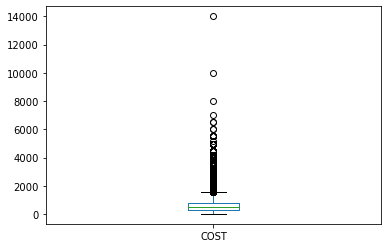

In [131]:
#Checking Outliers In Cost
Train_data['COST'].plot.box()

Here we can see that there is heavy outliers present in the cost column

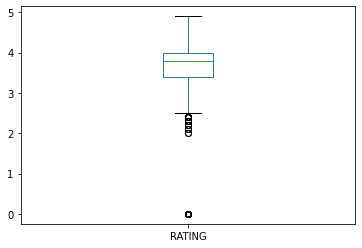

In [132]:
Train_data['RATING'].plot.box()

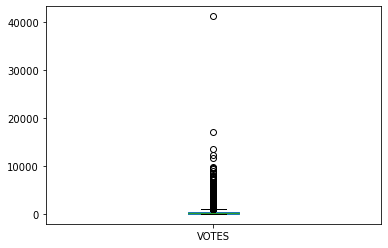

In [133]:
Train_data['VOTES'].plot.box()

So we can see that in Rating and Votes column there is also outliers present.

In [134]:
#Treating Outliers
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(Train_data))
threshold =3
new_df = Train_data[(z<3).all(axis=1)]
new_df

,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,...,Chennai,Bangalore,Hyderabad,Mumbai,New Delhi,Kochi,Gurgaon,Secunderabad,Noida,Navi Mumbai
0,3.6,49,1200.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,24,800.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,3.9,101,300.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,3.3,219,200.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13,0.0,0,400.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12677,4.0,123,550.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12682,3.6,30,450.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12684,3.8,492,550.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12685,3.8,546,500.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [135]:
Train_data.shape

(12690, 38)

In [136]:
#IQR Method

Q1 = Train_data.quantile(0.25)
Q3 = Train_data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

RATING              0.60
VOTES             365.75
COST              500.00
QUICK BITES         1.00
CASUAL DINING       1.00
CAFÉ                0.00
BAR                 0.00
DESSERT PARLOR      0.00
BAKERY              0.00
FINE DINING         0.00
BEVERAGE SHOP       0.00
LOUNGE              0.00
SWEET SHOP          0.00
North Indian        1.00
Chinese             1.00
South Indian        0.00
Fast Food           0.00
Continental         0.00
Biryani             0.00
Desserts            0.00
Italian             0.00
Beverages           0.00
Cafe                0.00
Mughlai             0.00
Street Food         0.00
Bakery              0.00
Seafood             0.00
Kerala              0.00
Chennai             0.00
Bangalore           0.00
Hyderabad           0.00
Mumbai              0.00
New Delhi           0.00
Kochi               0.00
Gurgaon             0.00
Secunderabad        0.00
Noida               0.00
Navi Mumbai         0.00
dtype: float64


In [137]:
df_new1 = Train_data[~((Train_data<(Q1-1.5*IQR)) | (Train_data> (Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

(220, 38)


In [168]:
#Checking skewness
df=Train_data
df.skew()

RATING            -2.214271
VOTES             14.522617
COST               3.978801
QUICK BITES        0.572878
CASUAL DINING      0.651855
CAFÉ               3.482442
BAR                3.958224
DESSERT PARLOR     4.201886
BAKERY             4.571879
FINE DINING        5.699442
BEVERAGE SHOP      6.927858
LOUNGE             7.756587
SWEET SHOP         8.882679
North Indian       0.306814
Chinese            0.655893
South Indian       1.673157
Fast Food          1.784506
Continental        2.293625
Biryani            2.680180
Desserts           2.859109
Italian            2.860783
Beverages          3.194990
Cafe               3.515972
Mughlai            3.707084
Street Food        4.024826
Bakery             4.053684
Seafood            4.316784
Kerala             4.657060
Chennai            1.744884
Bangalore          1.763428
Hyderabad          2.035845
Mumbai             2.127771
New Delhi          2.593095
Kochi              2.652463
Gurgaon            5.524568
Secunderabad       6

In [169]:
x= df.drop("COST",axis=1)
y= df["COST"] #Target variable

In [170]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x= power_transform(x,method="yeo-johnson")

In [171]:
x.shape

(12690, 37)

In [173]:
y=y.values.reshape(-1,1)
y.shape

(12690, 1)

# Preparing Dataset For Model Training

In [174]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [175]:
#Finding best random state

max_scr = 0
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random_state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-",r2_score(y_test,pred_test)*100)

At random_state  239  The model performs very well
At random_state:- 239
Training r2_score is:- 65.63078141703397
Testing r2_score is:- 65.62989467088697


In [176]:
#Finding best random state by other method
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,test_size = .25,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        
        
        
print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")
    



Best Accuracy 71.41796699958198 found on random_state 112


In [177]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_t,y,random_state=112,test_size=0.25)

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [159]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train_b,y_train_b)
y_pred = LR.predict(x_test_b)
r2score = r2_score(y_test_b,y_pred)
cvscore = cross_val_score(LinearRegression(),x_train_b,y_train_b,cv=5).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy = 71.41796699958198,Cross_val_score=63.54700484998167 & difference = 7.8709621496003095


In [179]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np


In [163]:
#All algorithm by using for loop
model = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train_b,y_train_b)
    m.score(x_train_b,y_train_b)
    predm = m.predict(x_test_b)
    rds= r2_score(y_test_b,predm)
    print("Accuracy Score Of ",m,"is :")    
    print("R2-Score= ",rds*100)
    rdscore = cross_val_score(m,x_t,y,cv=10)
    rdc=rdscore.mean()
    print("Cross Val Score= ",rdc*100)
    print("Error:")
    print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,predm))
    print('Mean Squared Error:= ',mean_squared_error(y_test_b,predm))
    print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,predm)))    
    print("**************************************************************************************************************")
    print('\n')
    
    

Accuracy Score Of  LinearRegression() is :
R2-Score=  71.41796699958198
Cross Val Score=  65.70726188599265
Error:
Mean Absolute Error:=  211.4509687174293
Mean Squared Error:=  107931.22648503695
Root Mean Square Error;=  328.5288822691803
**************************************************************************************************************


Accuracy Score Of  Lasso() is :
R2-Score=  71.38944297599838
Cross Val Score=  65.70403382652985
Error:
Mean Absolute Error:=  211.11934706342535
Mean Squared Error:=  108038.9386568626
Root Mean Square Error;=  328.69277244390787
**************************************************************************************************************


Accuracy Score Of  Ridge() is :
R2-Score=  71.4171430864811
Cross Val Score=  65.70738750297768
Error:
Mean Absolute Error:=  211.45383161627663
Mean Squared Error:=  107934.3377385819
Root Mean Square Error;=  328.5336173644668
*************************************************************************

As of now we can see that KNeighborsRegressor is giving best score and performing well however i will use ensemble technique
to boost the score.

In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor


In [165]:
model = [RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),SGDRegressor()]

for m in model:
    m.fit(x_train_b,y_train_b)
    m.score(x_train_b,y_train_b)
    predm = m.predict(x_test_b)
    rds= r2_score(y_test_b,predm)
    print("Accuracy Score Of ",m,"is :")    
    print("R2-Score= ",rds*100)
    rdscore = cross_val_score(m,x_t,y,cv=3)
    rdc=rdscore.mean()
    print("Cross Val Score= ",rdc*100)
    print("Error:")
    print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,predm))
    print('Mean Squared Error:= ',mean_squared_error(y_test_b,predm))
    print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,predm)))
    print("**************************************************************************************************************")
    print('\n')
    
    

Accuracy Score Of  RandomForestRegressor() is :
R2-Score=  71.20168024778894
Cross Val Score=  67.1893708996619
Error:
Mean Absolute Error:=  197.3018583535505
Mean Squared Error:=  108747.96665160054
Root Mean Square Error;=  329.7695659875249
**************************************************************************************************************


Accuracy Score Of  AdaBoostRegressor() is :
R2-Score=  -58.25042177502038
Cross Val Score=  -67.21271303798724
Error:
Mean Absolute Error:=  693.0456417015646
Mean Squared Error:=  597583.8777354483
Root Mean Square Error;=  773.0354957797529
**************************************************************************************************************


Accuracy Score Of  GradientBoostingRegressor() is :
R2-Score=  74.63590196728262
Cross Val Score=  69.37418281449223
Error:
Mean Absolute Error:=  192.58997617876358
Mean Squared Error:=  95779.6882159454
Root Mean Square Error;=  309.4829368736593
*************************************

Observation:-
    
After using of all techniques i found that GradientBoostingRegressor() is performing better with:-
  
R2-Score=  74.63590196728262
Cross Val Score=  69.37418281449223
Difference = 5.261719152790391

However  I will use Hyperparameter Tuning To boost the score

In [181]:
from sklearn.ensemble import GradientBoostingRegressor
parameters= {'loss':['ls', 'lad', 'huber', 'quantile'],'criterion':['friedman_mse', 'mse', 'mae'],'n_estimator':[50,100,150]}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)


{'criterion': 'friedman_mse', 'loss': 'ls','n_estimators'=100}


In [183]:
gbr = GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=100)
gbr.fit(x_train_b,y_train_b)
gbr.score(x_train_b,y_train_b)
predgbr = gbr.predict(x_test_b)
rds= r2_score(y_test_b,predgbr)
print("Accuracy Score Of ",gbr,"is :")    
print("R2-Score= ",rds*100)
rdscore = cross_val_score(gbr,x_t,y,cv=3)
rdc=rdscore.mean()
print("Cross Val Score= ",rdc*100)
print("Error:")
print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,predgbr))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,predgbr))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,predgbr)))
print("**************************************************************************************************************")
print('\n')
    
    

Accuracy Score Of  GradientBoostingRegressor() is :
R2-Score=  74.64169497120206
Cross Val Score=  69.36780523331146
Error:
Mean Absolute Error:=  192.56584026518567
Mean Squared Error:=  95757.81272451174
Root Mean Square Error;=  309.44759285622456
**************************************************************************************************************




# Model Saving

In [184]:
#Model Saving with best model RandomForestRegressor
import joblib 

joblib.dump(gbr,'gbrfile.obj')

['gbrfile.obj']

In [185]:
#Loading to see my model
gbr_from_joblib = joblib.load('gbrfile.obj')
gbr_from_joblib

GradientBoostingRegressor()

In [199]:
Test_data['RATING'] = np.where(Test_data['RATING']=="NEW",0, Test_data['RATING'])#Converting new into 0
Test_data['RATING'] = np.where(Test_data['RATING']=="-",0, Test_data['RATING'])#Converting _ into 0
Test_data['VOTES']= Test_data['VOTES'].str.replace(' votes', '')#Removing votes string from VOTES column


In [195]:
x=Test_data

In [196]:
x.shape


(4229, 37)

In [200]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X = stdsc.fit_transform(x)

In [201]:
x_predict=gbr_from_joblib.predict(X)
x_predict

array([822.04697186, 327.29067631, 713.69960575, ..., 431.07185742,
       412.76885114, 430.21523134])

In [202]:
# Saving The predictions in csv file
import numpy as np
import pandas as pd
prediction = pd.DataFrame(x_predict, columns=['Result']).to_csv('FoodCost_Prediction.csv')

In [203]:
Predicted = pd.read_csv('FoodCost_Prediction.csv')
Predicted.head().round()

,Unnamed: 0,Result
0,0,822.0
1,1,327.0
2,2,714.0
3,3,611.0
4,4,238.0


# END OF PROJECT